### Inlamning 2
#### Overview
Abstract / Introduction / Focus   
Dataset   
Model choice & Analysis   
Results analysis     
Summary / Conclusions   
Experiments    


#### Abstract / Introduction / Focus
We were given a dataset and set loose. Later it was clarified that we could reduce which features to ('Category', 'Size' och 'Quantity') use in order to make the process of getting to the analysis of the results shorter.   
     
I chose to make a Feed Forward Neural Network model. I don't think it's the best / optimal choice. But because the focus of the assignment is analysis of the model results, it's a perfect opportunity to have some fun!

Special thanks goes out to cgpt, instrumental for code, I couldn't have done it in this timeframe without it <3

#### Dataset
The dataset consists of Amazon web orders from india. It is tabular data.
##### Columns
'index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel' 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
'B2B', 'fulfilled-by', 'Unnamed: 22'

##### Pre-processing
My thinking for how to process this dataset is to one hot encode or binary encode all features. All features are categorical. Except 'qty'. It can be argued that 'qty' has a numerical relationship. In truth it has. I didn't reflect on that during the experiments. Using my "domain knowledge" of this dataset I argue that this general fact contains no additional information useful for predicting 'amount'. But not encoding 'qty' is another possible experiment to run!
Almost all values in 'size' could be seen as numerical even if they are saved as a string, ranging from smallest to largest. The exception being the size "free"  
Narrowing the scope to the features 'Category', 'Size' and 'Quantity' makes it easier. They have no missing values so one-hot encode and be done!
When it comes to the target I chose to drop all rows that did not have a value in 'amount' rather than imputing them somehow. Without a good model to predict them how can in reliably impute them?

#### Model choice and analysis
My model of choice was first a small feed forward neural network implemented pytorch with two hidden layers of two neurons each.
Later I implemented a model in keras, tensorflow with four hidden layers of 2 neurons each to simply tensorboard usage.   
   
I spent a lot of time trying to implement tensorboard logging in a Pytorch model. Pytorch supports GPU usage natively in Windows. I want to train with my GPU so it was my initial choice. but it proved to be hard logging for tensorboard with pytorch. I made a model in tensorflow and deepend(added layers to) the model in the end, and it was a lot easier to get some good looking tensorboard data this way! 
##### How many parameters does my 2 hidden layer model have?
For a ffnn the number of parameters are the connections(weight modifying the signal) plus the neurons so to speak(bias added to the sum of the weight modified signals). We have a 24 feature input layer connected to the first hidden layer with 2 neurons. This is 48 connections. Every output(bias) from the hidden layer also counts as parameter, adding 2. From the first to the second hidden layer we have two neurons connected to two. This is 4 connections, adding 2 from the output(bias) of the second layer. The last layer is a single "output neuron" if you can call it that, connected to the two neurons in the second hidden layer adding 2, and it has 1 output(bias). (48+2)+(4+2)+(2+1)=59 parameters.   
The connections are not the parameters. The weights and biases are. For every connection there's a weight. The signal going through all the connections in the previous layer to a neuron is modified by the weight for each connection, these signals are added together, then the bias is added to this signal.  

##### Tensorboard
There's a lot going on here. I did not spend the time needed to get any additional insights. Check this out! The points on the graph can be expanded, revealing sub-components, it's pretty cool!   
[image.png](attachment:image.png)    
   
And it has sweet looking stuff like this:   
  
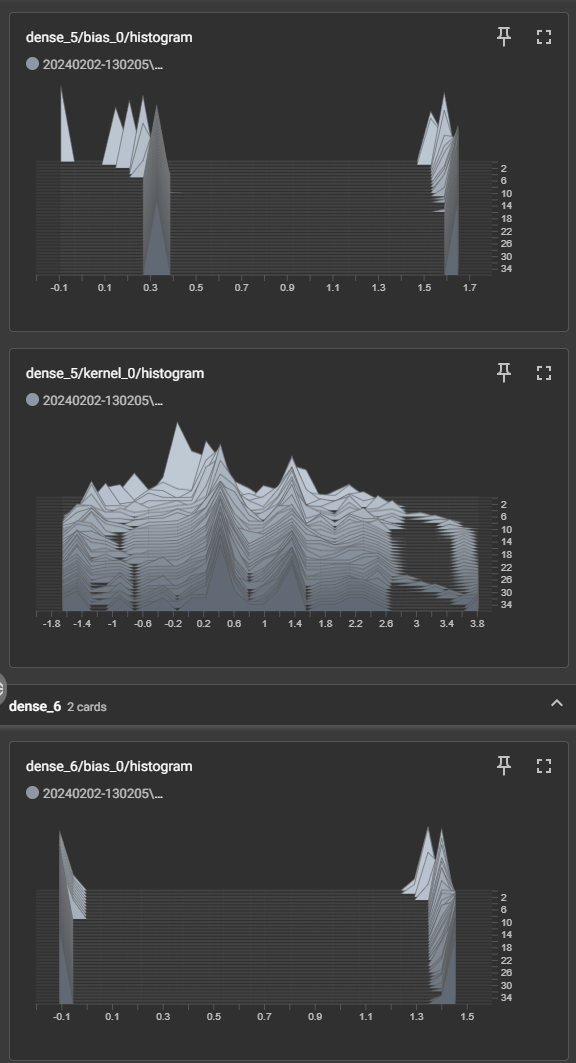 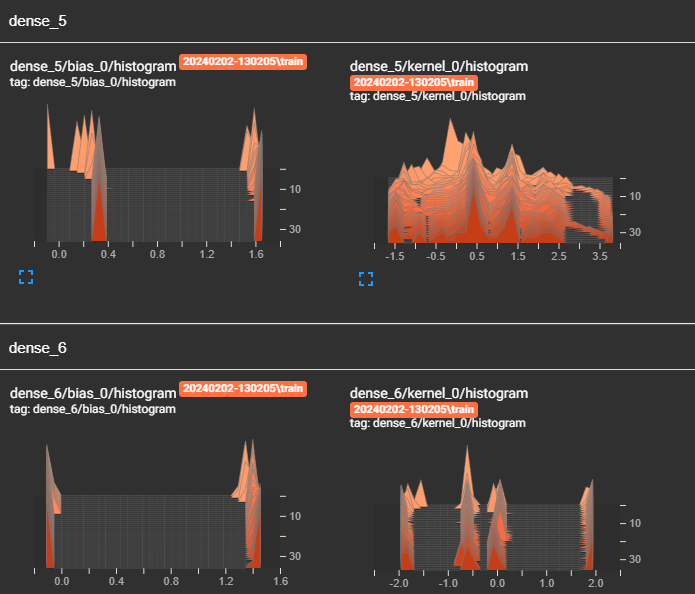    
For my purposes the only thing I used was the train and validation loss diagrams to double-check that the model was sufficiently trained.


#### Results analysis  
I think it's safe to say the model isn't getting any better
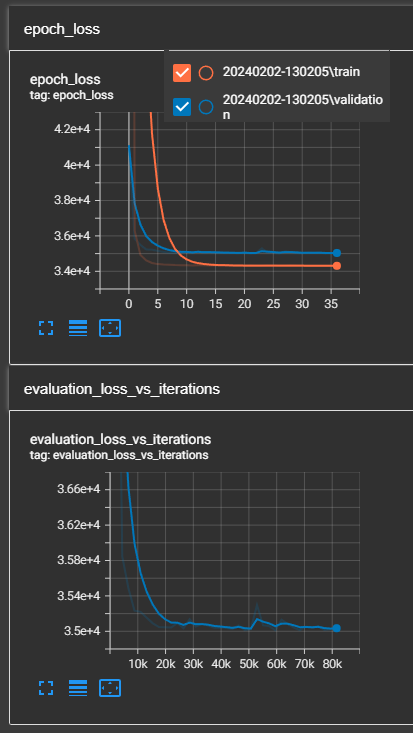

##### Predicted vs Actual
Plotting predicted and actual values tells us something about how the model fails. The predictions are bad in general and completely fails to predict the zero values. 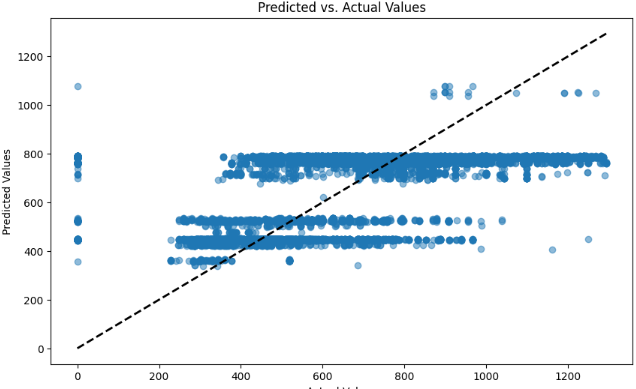

##### Residuals
Residual = Real Value - Predicted Value  
So what are we looking at here? And when does a diagram like this look "good"? It looks good when most values are close to zero and they follow a normal distribution.  
In his case they are a long way off from zero, that's bad. And they are in "buckets". As there aren't any "buckets" of values in the targets, that's not a good sign either.  
   
How can you visually spot a good and normal distribution?
You can think of it like this: Move all the points across the vertical line to the left. Most should end up around the zero point with a few higher up or lower down. If you stack them going left you then have a normal distribution.
The other thing to think about is that the outliers should be evenly spaced along the x-axis. If most are above zero, or below, that's a bad thing.
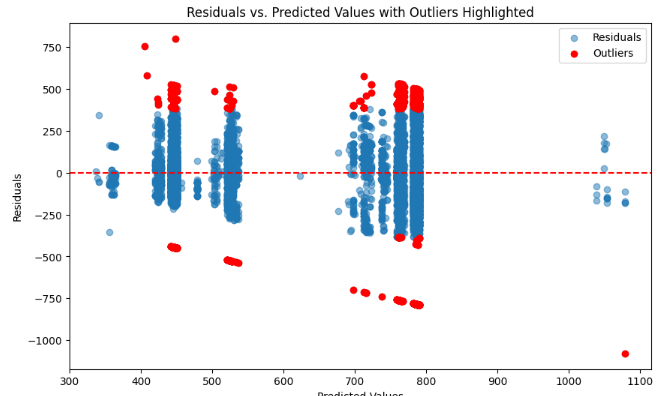   

##### Where the model struggles
If we don't settle for "mostly everywhere" and look at the R2:s lower than the mean 'category_kurta', 'category_top', 'category_western dress', 'category_set' are the categories with a big sample size in the test set that perform under the mean R2. Of course, they are not the only ones as you can see: 
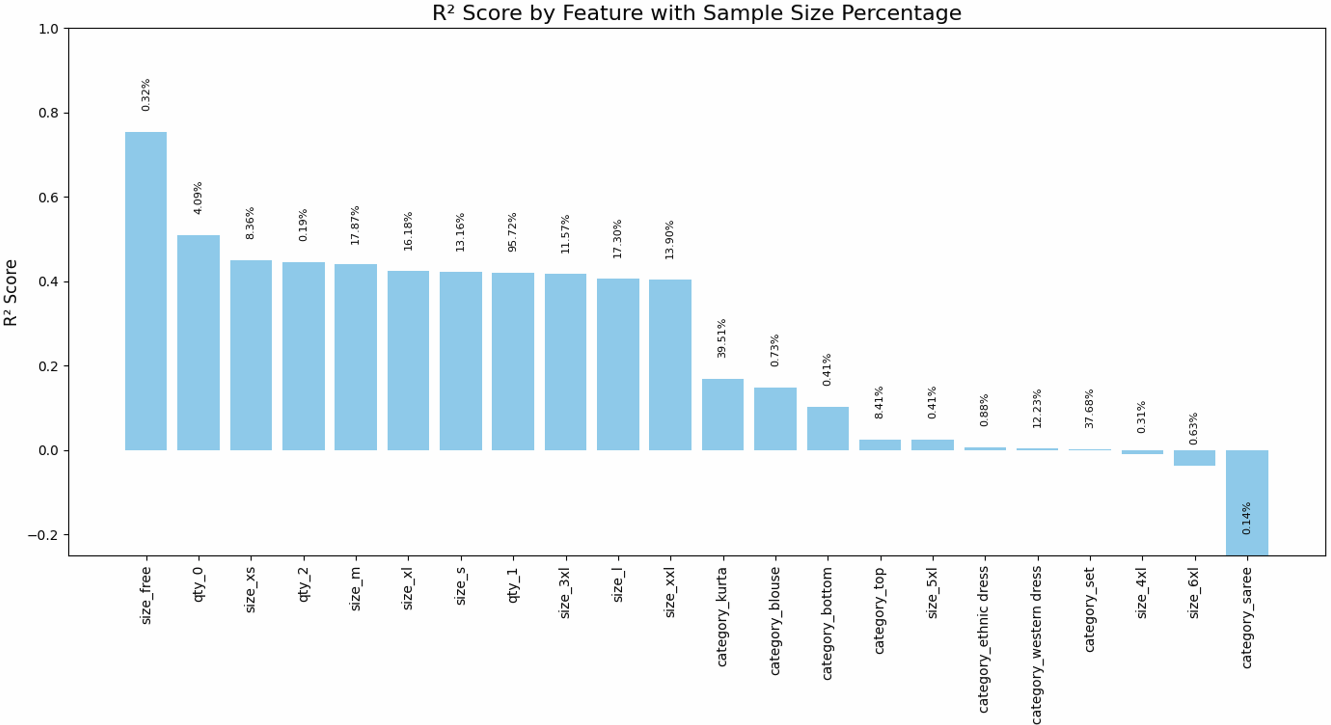   
Another way to look at it is by residuals by category. Here you see where the model is off by a lot:
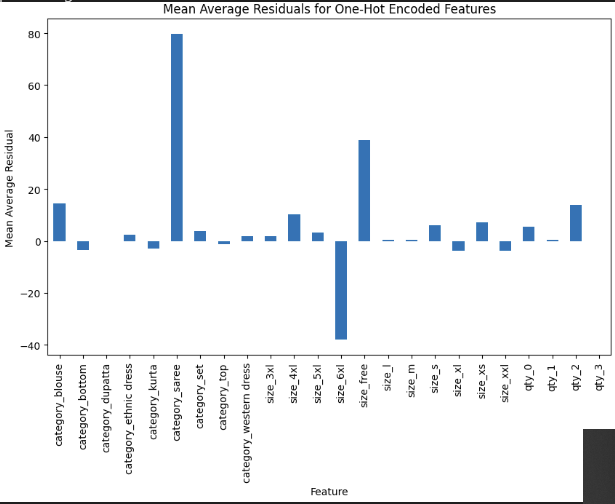



##### Feature Engineering
I tried removing low-frequency and low-R2 feature columns but neither improved model performance.

##### Conclusions
There's so little signal in the three feature columns that the choice of model hardly matters. If you take into consideration the rest of the features you can double the predictive power or at least the R2 score. 
Training a superficial model is easy. Understanding the model, the results and making quality code for deep analysis of both is a deep well, of which I have much left to drink.

#### Experiments in short
This is provided as a "brief" overview of what I did during the assignment. There is more info in [notes](https://github.com/Tuchulcha/Inlamning2/blob/master/Notes.ipynb) In the form of less structured thoughts and prompts. You can also look go into the folders of every experiment in the repo and look at the notebooks and stuff.
##### EXP1 - "Yolo Modelling With Data Processing"
Wanted to get a feel for the data. I Kept all features with less than 91 unique values except 'qty' and one hot encoded them. 179 one-hot features. Trained a ffnn. Stopped improving at R2 of 0.45
###### Short complete description
Load the dataset from csv file. Check for null values. Drop 'promotion-ids', 'fulfilled-by', 'Unnamed: 22' columns. Check columns types. Fill in missing 'Courier Status' with "Unknown". Fill missing 'Amount' with mean. Explore connection between 'Category', 'Size', 'Qty' in relation to 'Amount' 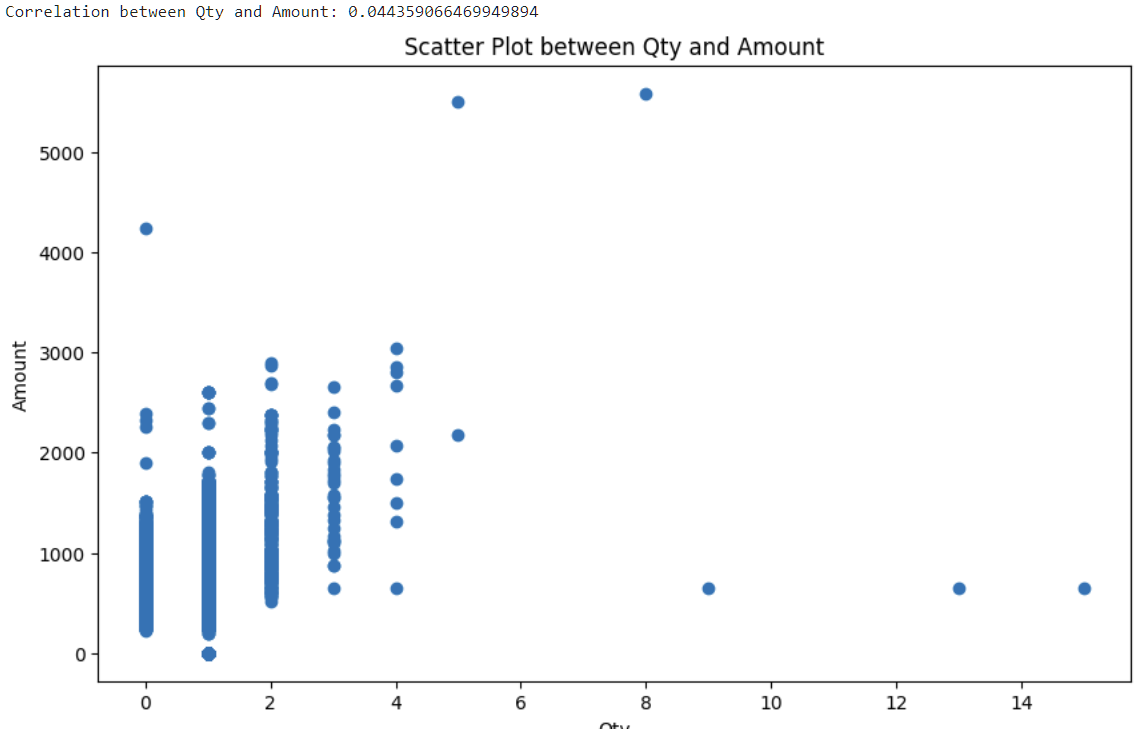. Explore number of unique values in each column. Count null value in columns. Drop columns with more than 92 unique values or just one and 'qty' because the weird spread of amount by qty. Delete rows with missing values. Correct spelling errors in 'ship-state'. One hot encode all columns with less than 92 unique values except target column 'Amount'. Example 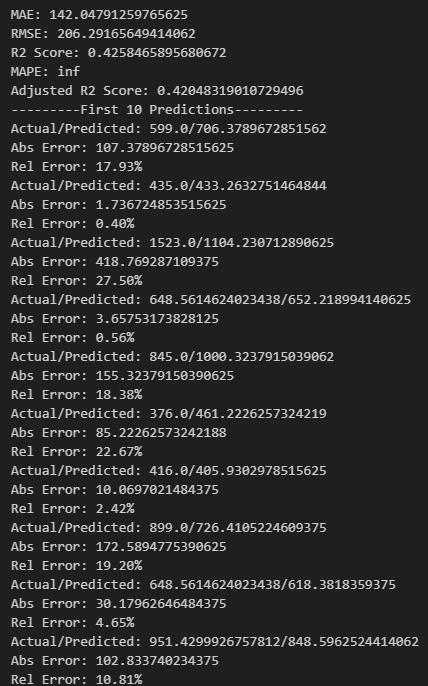.
##### EXP2 - "Yolo-Search"
Calculated correlation between features from Experiment 1 and 'amount' and started removing features that are close to 0 in correlation. Tried training the same ffnn on 120 and 68 features leaving those with stronger positive or negative correlations. 
120 features leaving only those features with a stronger correlation than |0.005|, R2: ~0.32  
68 features left, |0.01|, R2: ~0.36  
##### EXP3 - Data Exploring and Processing
I was initially exploring the value of all feature columns for the target prediction. This was the focus of this experiment. Made everything lower case. Dropped rows with missing values for 'amount'. Dropped 'ship-state' values with less than 4 entries after correcting state names in column.  
Noticed the high cardinality and imbalanced distribution of count on the values in both 'ship-state' and 'ship-city' I have some thoughts about if something can be done here that helps the model, like binning low count cities so the tail of cities is not so very very long. 
Another though is that maybe dropping the one-hot columns XS, 6xl, 4xl, 5xl, free, ethnic dress, bottom, aree, blouse, dupatta, all qty except 1 would help the model. While still keeping in scope only using the columns we were urged to limit our scope to.  
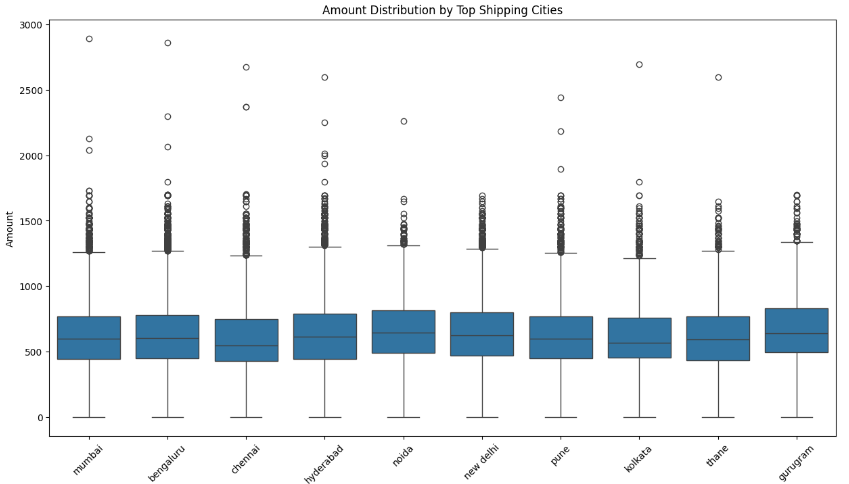  
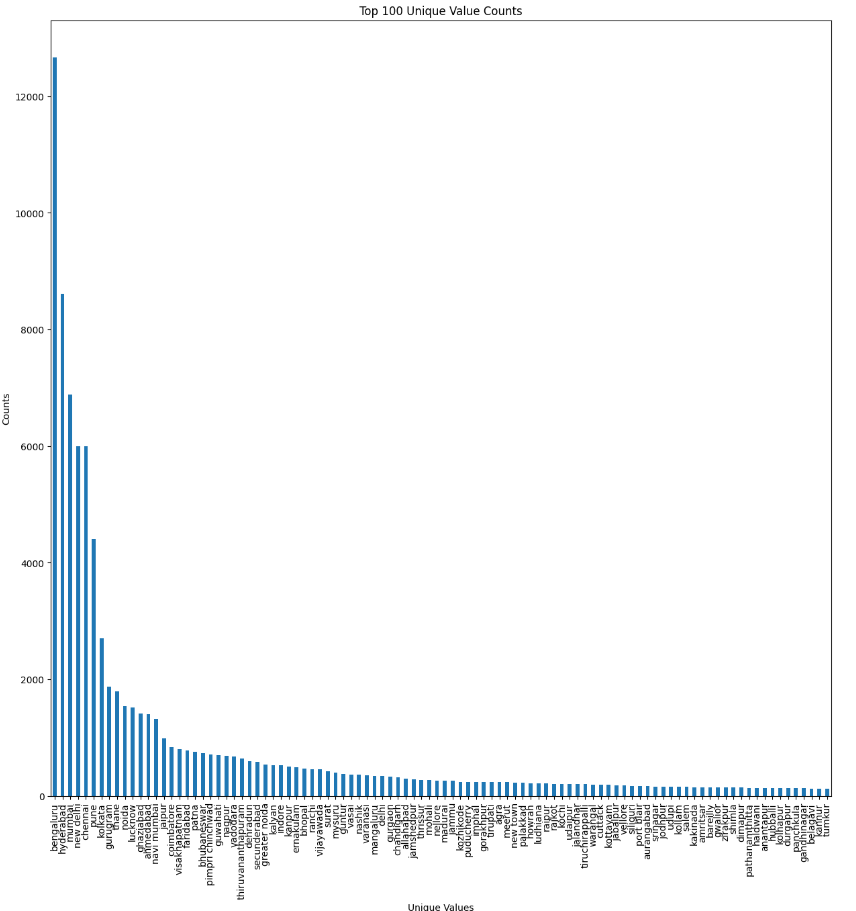   
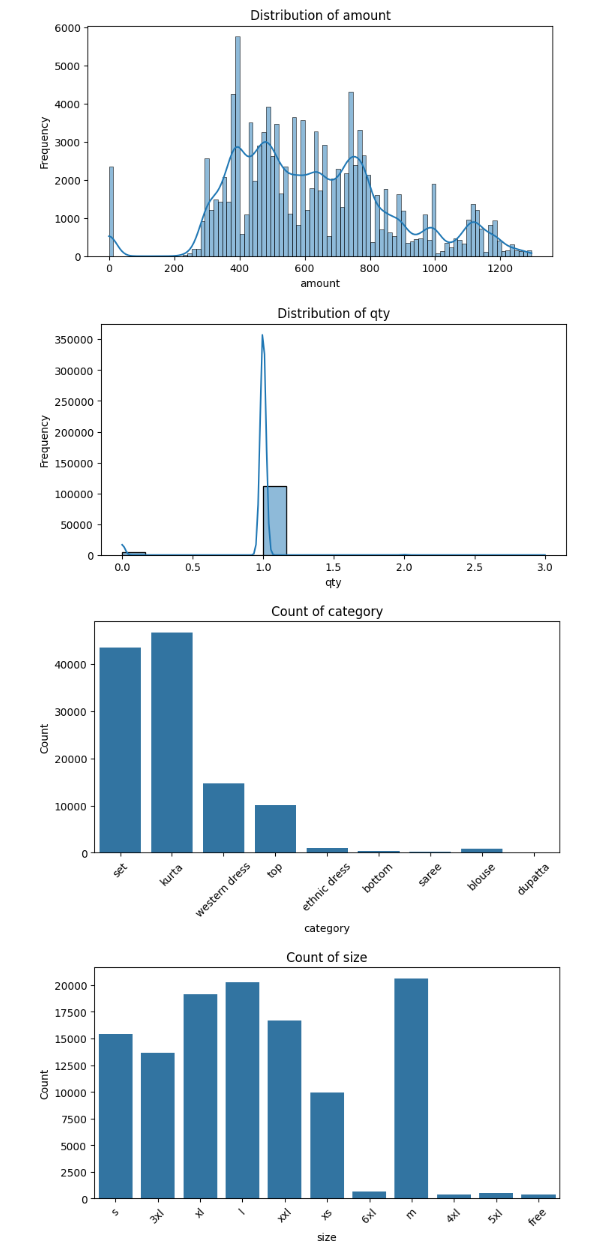

###### Short complete description
Load the dataset from csv file. Drop columns with only 1 unique value: ship-country, currency, index. Make all columns lowercase. Make all content in 'ship-city' column lower case. Caluculate and display percentage null values in columns with null values. Explore number of unique values in each column. Fill in missing fullfilled-by with 'unknowns-ship'. Fill in missing Unnamed: 22 with 'unknown-boolean'. Fill in missing promotion-ids with 'potential-id-unknown'. Fill in missing Courier Status with 'Unknown'. Fill in missing ship-state with 'unknown-state'. Fill in missing ship-city with 'unknown-city'. Fill in missing ship-postal-code with 'unknown-address'. Drop rows with empty 'Amount' values. Make all content lower-case. Correct 'ship-state' values. Drop entries in 'ship-state' with less than four entries. Correct 'ship-city' (make an attempt at). Exploring real indian cities dataset. Normalizing their and the feature data sets unicode characters. Match 'ship-city' to real indian cities. Check amount distribution in 'ship-city'. Remove outliers using IQR method. Explore binning cities. Explore distribution of values in 'amount' 'qty' 'size' and 'category' columns
###### Cleaning Indian Cities
Trying to clean up 'ship-city' turned in to quite the rabbit-hole! Long story short, if I had to clean an entire column like this in a big dataset, I would probably feed the values one batch at a time to a large language model. Of course there's a lot of work that can be coded for, like removing trailing spaces and punctuation, patterns for removing certain kinds of input errors like having a postcode after the city name. Fuzzymatching, maybe to a real set of Indian cities. But there's a lot of whack stuff going on in this column that can't be coded for. So I would first remove all errors that are easily spotted and coded for. But not go overboard. If there's punctuation in the middle of a value that has both state and city, that could help the LLM come to the right conclusion.
I can't really do what I did justice here. Just scroll down this [notebook](https://github.com/Tuchulcha/Inlamning2/blob/master/Experiment3/Exp3.ipynb) to get a sense of my madness  and maybe read through the experiment 3 [notes](https://github.com/Tuchulcha/Inlamning2/blob/master/Notes.ipynb)
 part that pertains to this.
##### Experiment Four
With the 3 recommended features in mind I explored what around what R2 I could expect. First I did this with XGboost. It's not what I want to use for analysis of the model or results, but it's a great model for tabular data. R2: ~0.42.   
Next I tried a transformer network for fun. one 128 dimension block with 4 attention heads quickly reached very close to the XGboost model.  
After that I tried to make as small a feed-forward neural network I could while keeping close to the 0.42 R2. I whittled it down to a network with 2 hidden layers of 2 neurons.  
There was a bug I noticed first in Experiment Five, I had split the data twice, the training set was smaller than expected. This proved to really help the neural networks converge a lot quicker. They still generalized as good on the test set.  
This is the experiment where I decided that my focus would be on analyzing a small ffnn and its results.
###### Short complete description
Loaded dataset. Dropped all columns except the three feature columns 'category', 'size', 'quantity' and the target column 'amount'. One-hot encoded all feature columns. Trained a XGboost model. Trained a transformer nn model. Trained and iteratively scaled down a feed forward nn model.
##### Experiment Five
This is where I spent most of my time. Both in trying to learn what to analyze in the model and the results. And trying to implement the code I needed to analyze the model and the results. 
I wanted to figure out how to understand the model during traning and inference.  
How to understand the predictions.  
Using a pytorch model with tensorflow proved hard for me. I did implement hooks and save data. A lot in MB.  
I saved the model as onnx and looked at it in netron. Counted the parameters.
Looked at residuals and learned about what to look for. Predicted and actual values. Did a Shapiro-Wilk test.
###### Short complete description
Explored or thought of things for analysis: tensorboard, netron, weights and biases, neptune, matplotlib, seaborn, yellowbricks etc. How to evaluate model performance. R2 thinking. Save predictions and targets. Install tensorboard. Implement hooks in pytorch model. Log data. Export model in onnx. Export model in pytorch format. Get model running from saved file. Plot residuals. Plot targets and predictions. Learn how to look at residuals. Count parameters in model.
##### Experiment Six
The small 2-2 ffnn did not converge when re-training after the bug that reduced the training set size was found and corrected. I outlined different things to try in order to make it converge. I settled on the first method I tried, which was to first train it with the smaller set for a number of epochs, then on the entire set.  
I also saved the network to avoid having to re-train and uploaded it to netron.app. 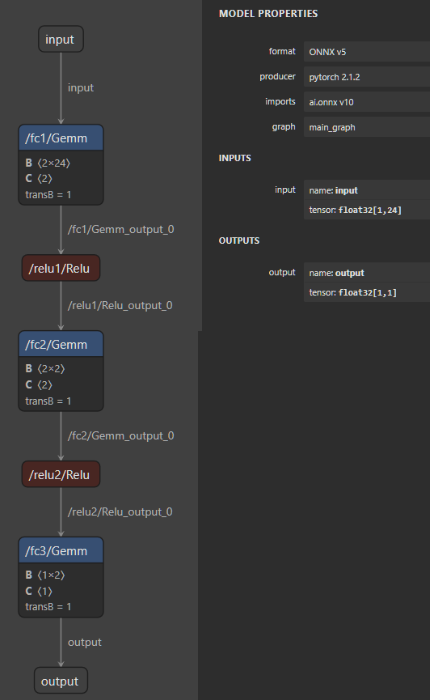
##### Experiment Seven
Experimented with k-folds cross validation, no convergence to R2: 0.42
##### Experiment Eight
Experimented with feature selection. Dropping different one-hot encoded columns. Both low frequency and low R2 columns. 
R2 went down in all tried cases.
##### Experiment Nine
Re-created the model in tensorflow, added two layers. Mean average residual for features. R2-score by feature with sample size percentage. correlation matrix.   
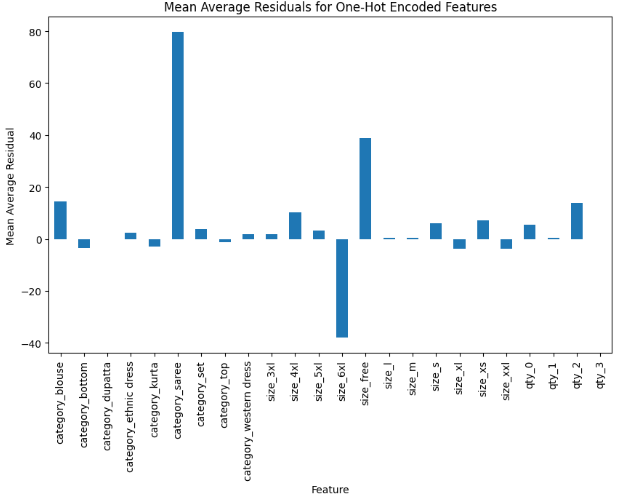 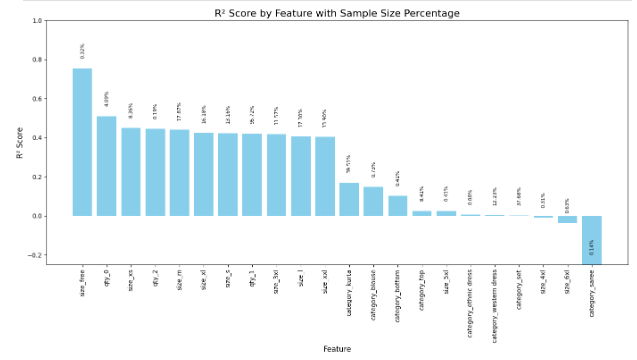 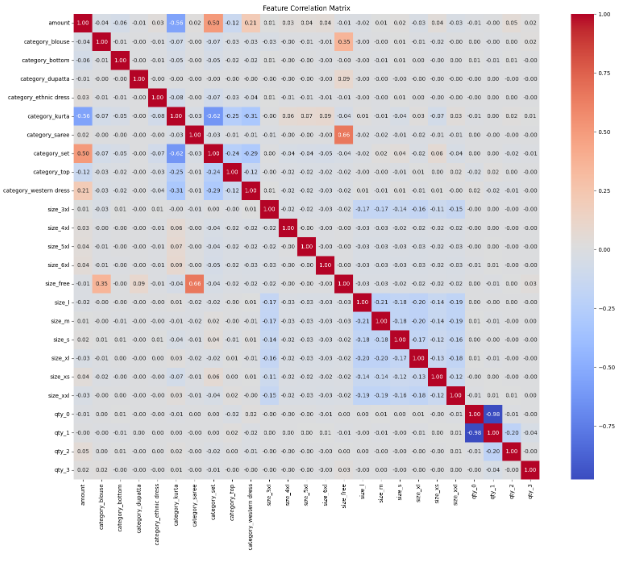
##### Experiment Ten
Talking with some classmates about what R2 is possible to get using the best features in the dataset with some proper cleaning sparked a question in me: Can a dnn get the same R2 without any feature selection or good cleaning? I mean, the information needed is still in there, right? Just harder to use.  
First I did some feature selection and cleaning. With this I got a R2 of 0.0876 with XGBoost. Now all I had do to was reach this with the entire dataset, without any proper cleaning. I just filled in blank values with "unknown" and set a transformers network to task. I quickly reached a R2 of 0.84.  
I also made a much larger network that I am currently training for a lot longer, for fun.   
But I think I can answer my question, at least for this dataset: Yes, a dnn can find the information in the noise.